# Visualization of Topic Modeling with t-SNE - Cakes and Tensors Booz Allen Hamilton 
 - Summer K. Rankin 

### Create a new conda environment with the correct packages 

To create a new environment in (ana)conda - which you should do for each project so you dont break stuff - download the `environment.yml` file and follow these directions. 

Open a conda prompt (windows) or a terminal window (linux/mac):<br>
            `$ cd ~/Documents/path_where_i_put_the_yml_file/`<br>
            `$ conda env create -f tsne_environment.yml`<br>

Activate the environment (the name is in the yml file)<br>
            `$ conda activate tsne_tut`<br>
            `$ jupyter notebook` 

Then click on the jupyter notebook titled `topic_modeling_tSNE_tutorial.ipynb`

# 0.0 load the packages

In [21]:
import pickle
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,  TruncatedSVD
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt

# for tsne plotting in 3d in jupyter nb
from mpl_toolkits.mplot3d import Axes3D

import pyLDAvis,pyLDAvis.sklearn
from IPython.display import display

import plotly.express as px

## NLP Steps

        - 1. Clean text (already did this for you, you're welcome)
        - 2. Vectorize 
        - 3. Topic modeling
        - 4. Assign topics to documents
        - 5. Visualization

# 1 (open) clean talks

In [6]:
with open('./data/cleaned_talks.pkl', 'rb') as picklefile:
    cleaned_talks = pickle.load(picklefile)    

# 2 Vectorize
For this tutorial the tokenization and vectorization gets bundled together because we are using skleanrn's feature extraction functions. This means we will set the parameters of these functions to tokenize the way we want, include n-grams, and set thresholds for max or min document frequency of a term. https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

- takes us from words to numbers 
- create the document-term matrix which is the basis for all modeling
    - row = document, column = word or n-gram, data = word's weight for that document
- we will vectorize by counting the frequency of each term in each document
+ CountVectorizer: Convert a collection of text documents to a matrix of token counts 


# 3 Topic modeling 
+ use the document term matrix created with vectorization, to create a latent space and find the words that tend to ocurr together 

- We will use LDA Latent Dirichlet Allocation
+ this will reduce the data from thousands of terms (dimensions) to 20 topics. 
+ Creates a latent space that is 20 dimensions.

In [7]:
def topic_mod_lda(data,topics=5,iters=10,ngram_min=1, ngram_max=3, max_df=0.6, max_feats=5000, random_state=42):
    
    """ use count vectorizer to turn words into numbers for each document(rows)
    then use Latent Dirichlet Allocation to get topics"""
    
    
    vectorizer = CountVectorizer(ngram_range=(ngram_min,ngram_max), 
                             stop_words='english', 
                             max_df = max_df, 
                             max_features=max_feats)
    
      
    #  `fit (train), then transform` to convert text to a bag of words

    vect_data = vectorizer.fit_transform(data)
    
    
    
    lda = LatentDirichletAllocation(n_components=topics,
                                    max_iter=iters,
                                    random_state=random_state,
                                    learning_method='online',
                                    n_jobs=-1)
    
    lda_data = lda.fit_transform(vect_data)
    
    
    # to display a list of topic words and their scores 
    
    def display_topics(model, feature_names, no_top_words):
        for ix, topic in enumerate(model.components_):
            print("Topic ", ix)
            print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    display_topics(lda, vectorizer.get_feature_names(),20)
    
    
    return vectorizer, vect_data, lda, lda_data

In [8]:
vect_mod, vect_data, lda_mod, lda_data = topic_mod_lda(cleaned_talks,
                                                         topics=20,
                                                         iters=50,
                                                         ngram_min=1, 
                                                         ngram_max=2, 
                                                         max_df=0.5, 
                                                         max_feats=2000,
                                                         random_state=42)

Topic  0
love old story wanted home friend feel family told man year old moment night kid took knew asked remember month felt
Topic  1
africa african aid government country poor bank money south continent nigeria opportunity kenya knowledge poverty corruption story sector village institution
Topic  2
data information computer technology internet phone digital online network medium machine using company web algorithm google device tool example software
Topic  3
brain robot machine body mind computer sound eye example pattern object hand neuron control memory behavior light using face experience
Topic  4
food water eat plant farmer ant seed product waste feed grow farm produce crop eating diet bread soil cow solution
Topic  5
energy ca climate oil carbon fuel climate change nuclear plant gas plastic global vaccine percent bee emission natural co2 clean power
Topic  6
social society group power political government choice value decision law believe rule individual issue example reason ame

## 4 Visualize 

## 4.1 pyLDAvis
+ this is one of my favorite ways to initially interact with the topics (to tune hyperparams) and share with clients
+ works for python (sklearn and Gensim) and R
+ sharing is a simple as saving the html 

+ link to a demo

https://nbviewer.jupyter.org/github/bmabey/hacker_news_topic_modelling/blob/master/HN%20Topic%20Model%20Talk.ipynb

In [25]:
# Setup to run in Jupyter notebook
pyLDAvis.enable_notebook()

# Create the visualization, be sure to sort_topics=False to keep the same order as above, that's important if we want to try and label
vis = pyLDAvis.sklearn.prepare(lda_mod, vect_data, vect_mod, sort_topics=False, mds='mmds')

# Export as a standalone HTML web page
pyLDAvis.save_html(vis, 'lda_vis.html')

# Let's view it!
display(vis)

/anaconda3/envs/tsne_tut/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.194876 -0.070008       1        1  13.504338
1      0.069080 -0.482236       2        1   0.856887
2     -0.109273  0.100501       3        1   6.379053
3     -0.054101  0.049815       4        1   6.392620
4     -0.184830  0.331142       5        1   1.847420
5      0.074964  0.383233       6        1   2.070844
6      0.159832 -0.136356       7        1   6.831653
7     -0.244143  0.000330       8        1   6.832925
8      0.284028  0.192354       9        1   2.438245
9      0.007561  0.235711      10        1   3.240454
10    -0.287477 -0.169334      11        1   4.715320
11     0.105418 -0.205374      12        1   5.984160
12    -0.279357  0.129933      13        1   4.968861
13     0.406537 -0.157899      14        1   2.060123
14     0.110915 -0.007212      15        1   8.392949
15     0.237007  0.036176      16        1   5.019838
16     0.133566  0.200474      17        1   3.808211
17     0.011616 -0.024104      18        1   4.763313
18    -0.155286 -0.196179      19        1   5.606373
19    -0.091181 -0.210967      20        1   4.286414, topic_info=     Category         Freq         Term        Total  loglift  logprob
1963  Default  4059.000000        woman  4059.000000  30.0000  30.0000
1547  Default  2943.000000       school  2943.000000  29.0000  29.0000
417   Default  3979.000000      country  3979.000000  28.0000  28.0000
984   Default  2747.000000          kid  2747.000000  27.0000  27.0000
308   Default  3760.000000        child  3760.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
1647  Topic20   254.284145         sort  2572.822823   0.8354  -5.2373
1925  Topic20   235.945652       wanted  2405.474520   0.8278  -5.3121
794   Topic20   223.066040      getting  1916.349242   0.9990  -5.3682
950   Topic20   220.703913  interesting  1682.301350   1.1186  -5.3789
1852  Topic20   220.836824       trying  2278.610480   0.8158  -5.3783

[971 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         1  0.016998           000
0         3  0.096435           000
0         4  0.005897           000
0         5  0.002428           000
0         6  0.002428           000
...     ...       ...           ...
1996     12  0.029047  young people
1996     15  0.106505  young people
1996     19  0.006455  young people
1997      3  0.818288       youtube
1997     14  0.177209       youtube

[6859 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# 4.2 assign topics to documents
+ this step is important if we want to use tSNE or create a recommendation engine 

1. for each document, assign the topic (column) with the  highest score from the LDA
2. put this information into a pandas dataframe for labeling

In [87]:
topic_ind = np.argmax(lda_data, axis=1)
topic_ind.shape

#create labels for plotting with matplotlib 
labels_mpl = topic_ind

# put into dataframe for plotly
tsne_labels = pd.DataFrame(labels_mpl)

# save to csv here if not assigning labels and leaving as numbers
#tsne_labels.to_csv('./data/topic_numbers.csv')

In [88]:
tsne_labels[tsne_labels==0] = "memories"
tsne_labels[tsne_labels==1] = "africa"
tsne_labels[tsne_labels==2] = "tech"
tsne_labels[tsne_labels==3] = "neuroscience"
tsne_labels[tsne_labels==4] = "agriculture"
tsne_labels[tsne_labels==5] = "climate"
tsne_labels[tsne_labels==6] = "politics"
tsne_labels[tsne_labels==7] = "belief, mortality"
tsne_labels[tsne_labels==8] = "astrophysics"
tsne_labels[tsne_labels==9] = "cancer"

tsne_labels[tsne_labels==10] = "sex"
tsne_labels[tsne_labels==11] = "war"
tsne_labels[tsne_labels==12] = "?"
tsne_labels[tsne_labels==13] = "games"
tsne_labels[tsne_labels==14] = "econimics"
tsne_labels[tsne_labels==15] = "medicine"  
tsne_labels[tsne_labels==16] = "ocean"
tsne_labels[tsne_labels==17] = "environment"
tsne_labels[tsne_labels==18] = "architecture"
tsne_labels[tsne_labels==19] = "movie"

In [11]:
tsne_labels.head()

,0
0,memories
1,climate
2,tech
3,architecture
4,war


In [12]:
#save labels to csv and pkl if  plotting in plotly's site

tsne_labels.to_csv('./data/tsne_labels.csv')

#with open('./data/tsne_labels.pkl', 'wb') as picklefile:
#    pickle.dump(tsne_labels, picklefile)

# Assign topics randomly for comparison
Shuffle the topic assignents to be random
plot tsne for comparison 

In [40]:
topic_ind_rand = np.argmax(lda_data, axis=1)
np.random.shuffle(topic_ind_rand)

In [43]:
labels_mpl_rand = topic_ind_rand
tsne_labels_rand = pd.DataFrame(labels_mpl_rand)


# 4.3 tSNE
A way to reduce dimensionality to three (or 2) components so that we can visualize where/if there are clusters in document-topic space.
The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. Those differences can be a major source of confusion.


https://distill.pub/2016/misread-tsne/
https://www.youtube.com/watch?v=NEaUSP4YerM

#  `DOES NOT PRESERVE DISTANCE!!!  `
# `DO NOT CLUSTER IN THIS SPACE!!!!!!! VIZ ONLY`

Want to tweak the hyperparameters so that we get the lowest KL divergence.

A second feature of t-SNE is a tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

In [111]:
# angle value close to 1 means sacrificing accuracy for speed


tsne_model = TSNE(n_components=3, verbose=1, random_state=44, angle=.50,
                  perplexity=40,early_exaggeration=12,learning_rate=200) 

# 20-D -> 3-D
tsne_lda = tsne_model.fit_transform(lda_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2467 samples in 0.002s...
[t-SNE] Computed neighbors for 2467 samples in 0.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2467
[t-SNE] Computed conditional probabilities for sample 2000 / 2467
[t-SNE] Computed conditional probabilities for sample 2467 / 2467
[t-SNE] Mean sigma: 0.143558
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.106636
[t-SNE] KL divergence after 1000 iterations: 1.068281


#### put data into a dataframe and save if uploading to plotly

In [112]:
tsne_data = pd.DataFrame(tsne_lda)
tsne_data.to_csv('./data/tsne_lda.csv')
tsne_data.head()

,0,1,2
0,-8.729299,1.190830,1.831224
1,1.630823,-2.658934,2.785392
2,2.571304,8.595439,-0.739042
3,2.664855,-7.562900,4.917594
4,1.470420,4.724796,14.800655


## 4.3.1 Plot using matplotlib

In [113]:
def plot_tsne(X, y, v1=0, v2=0, title = 't-SNE'):
    """ X  = values from tsne (or other dim reduction algo) 
    y = corresponding labels (topics) which determines the color
    v1 = viewing angle1
    v2 = viewing angle2"""
 
    fig = plt.figure(1, figsize=(13, 10))
    ax = Axes3D(fig, elev=-150, azim=110)

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
               cmap=plt.cm.hot, edgecolor='k', s=50)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("1st ",fontsize=16)
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd",fontsize=16)
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd",fontsize=16)
    ax.w_zaxis.set_ticklabels([])
    ax.view_init(v1,v2)

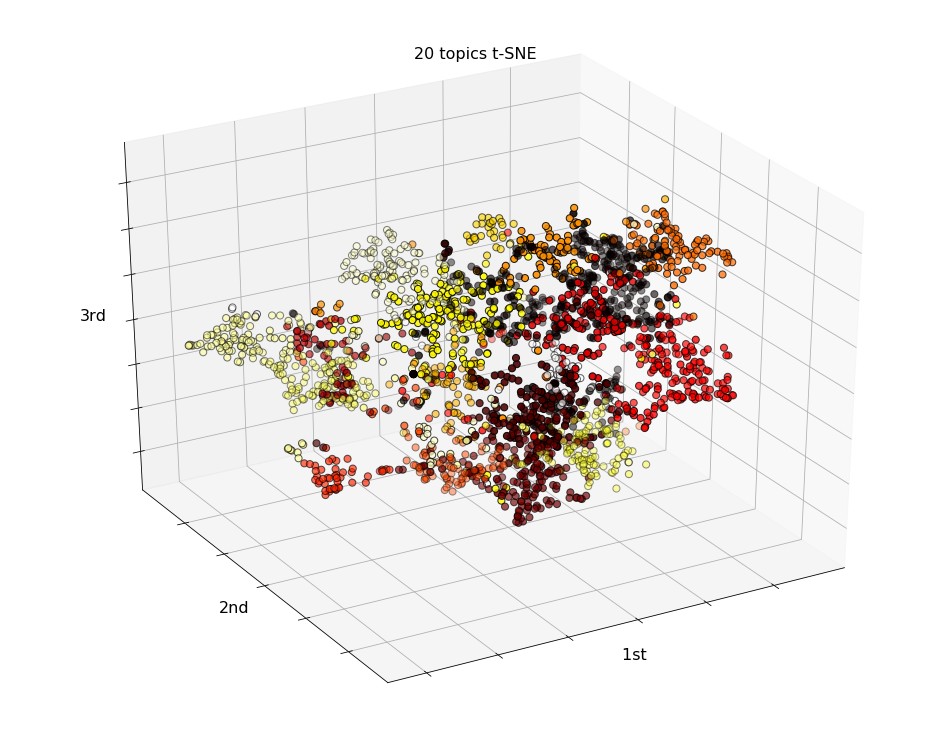

In [114]:
plot_tsne(tsne_lda, labels_mpl, 30, 60, title='20 topics t-SNE')

## randomly assigned topics


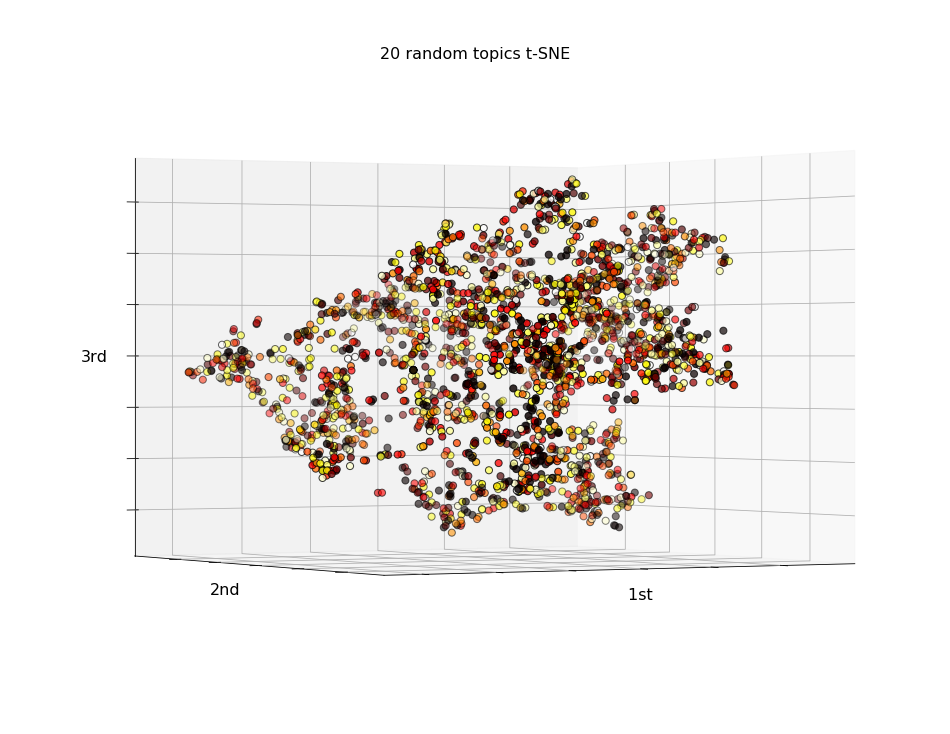

In [115]:
plot_tsne(tsne_lda, labels_mpl_rand, 0, 60, title='20 random topics t-SNE')

## 4.3.2 Plot using Plotly in our notebook

In [116]:
tsne_labels.rename(columns={0:'topic'},inplace=True)


In [117]:
tidy_df = pd.merge(tsne_data,tsne_labels, left_index=True, right_index=True, how='outer')
tidy_df['topic'] = tidy_df.topic.astype(str)
tidy_df.rename(columns={0:'zero',1:'one',2:'two'},inplace=True)
tidy_df.head()

,zero,one,two,topic
0,-8.729299,1.190830,1.831224,memories
1,1.630823,-2.658934,2.785392,climate
2,2.571304,8.595439,-0.739042,tech
3,2.664855,-7.562900,4.917594,architecture
4,1.470420,4.724796,14.800655,war


In [118]:
fig = px.scatter_3d(tidy_df, x='zero', y='one', z='two',
                    color='topic', size_max=.4 , 
                    title='20 topics t-SNE', opacity=0.85)

fig.show()

## plotly with randomly assigned topics 

In [119]:
tsne_labels_rand.rename(columns={0:'topic'},inplace=True)
tidy_df_rand = pd.merge(tsne_data,tsne_labels_rand, left_index=True, right_index=True, how='outer')
tidy_df_rand['topic'] = tidy_df_rand.topic.astype(str)
tidy_df_rand.rename(columns={0:'zero',1:'one',2:'two'},inplace=True)


In [120]:
fig = px.scatter_3d(tidy_df_rand, x='zero', y='one', z='two',
                    color='topic', size_max=.4 , 
                    title='20 topics randomly assigned t-SNE', opacity=0.85)

fig.show()